### 앙상블 학습 (Ensemble Learning)
- 어떤 데이터의 값을 예측한다고 할 때, 하나의 모델만 가지고 결과를 도출할 수도 있지만, 여러 개의 모델을 조화롭게 학습시켜 그 모델들의 예측결과를 이용한다면, 더 정확한 예측값을 구할 수 있다.
- 여러 개의 분류기를 생성하고 그 예측을 결합하여 1개의 분류기를 사용할 때보다 더 정확하고 신뢰성 높은 예측을 도출하는 기법이다.
- 강력한 하나의 모델을 사용하는 것 보다 약한 모델을 여러 개 조합하여 더 정확한 예측에 도움을 주는 방식이다.
- 앙상블 학습의 주요 방법은 배깅(Bagging)과 부스팅(Boosting)이다.

  
#### 보팅(Voting)
- "하나의 데이터 세트"에 대해 서로 다른 알고리즘을 가진 분류기(Classifier)를 결합하는 방식이다.
- 서로 다른 분류기들에 "동일한 데이터 세트"를 병렬로 학습해서 예측값을 도출하고, 이를 합산하여 최종 예측값을 산출해내는 방식을 말한다.  
> 1. 하드 보팅(Hard Voting)
> - 각 분류기가 만든 예측값을 다수결로 투표해서 가장 많은 표를 얻은 예측값을 최종 예측값으로 결정하는 보팅 방식을 말한다.
>
> <img src='./images/hard_voting.png' w   ith='420px'>
>
> 2. 소프트 보팅(Soft Voting)
> - 각 분류기가 예측한 타겟별 확률을 평균내어 가장 높은 확률의 타겟을 최> <img src='./images/soft_voting.png' width='440px'>

#### 배깅(Bagging, Bootstrap Aggregation)
- 하나의 데이터 세트에서 "여러 번 중복을 허용하면서 학습 데이터 세트를 랜덤하게 뽑은 뒤 (Bootstrap)" 하나의 예측기 여러 개를 병렬로 학습시켜서 결과물을 집계(Aggregation)하는 방법이다.
- Voting  방식과 달리 같은 알고리즘의 분류기를 사용하고 훈련 세트를 무작위로 구성하여 각기 다르게(독립적으로 , 병렬로) 학습시킨다.
- 학습 데이터가 충분하지 않더라도 충분한 학습효과를 주어 과적합등의 문제를 해결하는데 도움을 준다.
- 배깅방식을 사용한 대표적인 알고리즘이 바로 랜덤 포레스트 알고리즘이다.

<img src='./images/voting_bagging.png' width='440px'>ng' width='440px'>

 #### 보팅 (Voting)
**VotingClassifier(n_estimators, voting)**
- n_estimators: 추가할 모델 객체를 list형태로 전달한다. 각 모델은 튜플 형태로 ('key', model)로 작성한다.
- voting: soft, hard 둘 중 선택한다(default: 'hard')

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
c_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
c_df['target'] = cancer.target

c_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [2]:
corr = c_df.corr()
corr[['target']].sort_values(by='target', ascending=False)[1:]

,target
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499
mean smoothness,-0.358560


Text(0.5, 1.0, 'Correlation')

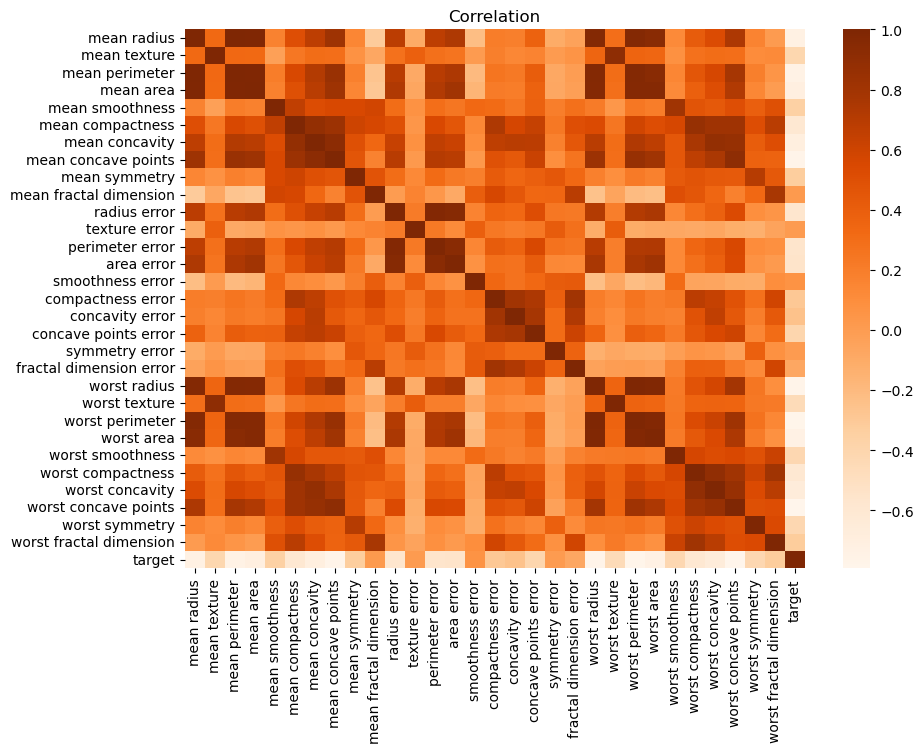

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title('Correlation')

# 모든 요소가 독립적이지 않음

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

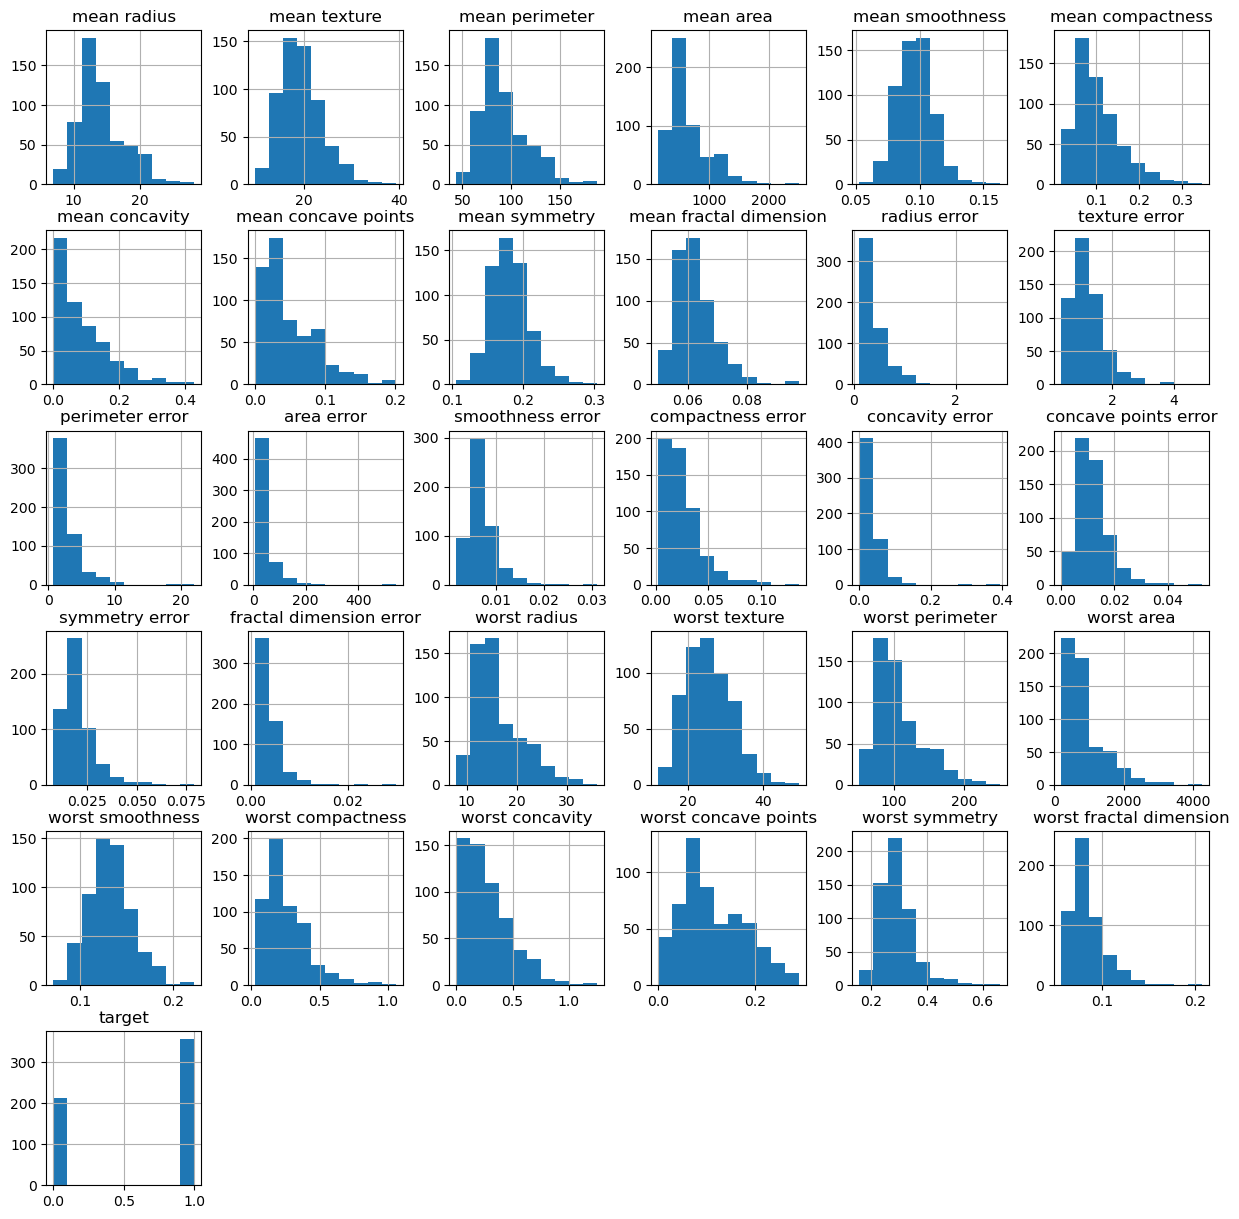

In [4]:
c_df.hist(figsize=(15, 15))

In [ ]:
# 오버샘플링


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

dtc_parameters = {'max_depth': [10, 11, 12], 'min_samples_split': [20, 21, 22]}
svc_parameters = {'svc__C': [0.01, 0.1, 1, 10, 100],
                   'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                   'svc__kernel': ['linear', 'rbf']
                  }
knn_c_parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True)

knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameters, cv=5, refit=True, return_train_score=True)

In [ ]:
g_dtc.fit(X_train_over, y_train_over)

In [ ]:
g_svc.fit(X_train_over, y_train_over)

In [ ]:
g_knn.fit(X_train_over, y_train_over)

In [ ]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

dtc = g_dtc.best_estimator_

In [ ]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

In [ ]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

In [ ]:
from sklearn.ensemble import VotingClassifier

#### 배깅 (Bagging) - 랜덤 포레스트 (Random Forest)
**RandomForestClassifier()**

In [ ]:
111111111111111111